# Datawrapper Tutorial

Datawrapper ist ein service um ansprechende, informative und einfach zu nutzende Visualisierungen zu erstellen. In diesem Tutorial werden einige Beispiele gezeigt um Visualisierungen mit Datawrapper zu erstellen.

Für dieses Tutorial werden die Python Pakete `datawrapper`, `requests` und `pandas` benötigt, welche mit `pip` installiert werden können.

In [2]:
!pip --quiet install datawrapper requests pandas

In [3]:
import requests
import pandas as pd

antwort = requests.get('https://www.openligadb.de/api/getmatchdata/bl1/2020')
spiele = pd.DataFrame(antwort.json())

In [4]:
import json
json = json.loads(spiele.explode('MatchResults').explode('Goals').to_json(orient="records"))    
spiele = pd.json_normalize(json)

In [5]:
list(spiele.columns.values)

['MatchID',
 'MatchDateTime',
 'TimeZoneID',
 'LeagueId',
 'LeagueName',
 'MatchDateTimeUTC',
 'LastUpdateDateTime',
 'MatchIsFinished',
 'NumberOfViewers',
 'Group.GroupName',
 'Group.GroupOrderID',
 'Group.GroupID',
 'Team1.TeamId',
 'Team1.TeamName',
 'Team1.ShortName',
 'Team1.TeamIconUrl',
 'Team1.TeamGroupName',
 'Team2.TeamId',
 'Team2.TeamName',
 'Team2.ShortName',
 'Team2.TeamIconUrl',
 'Team2.TeamGroupName',
 'MatchResults.ResultID',
 'MatchResults.ResultName',
 'MatchResults.PointsTeam1',
 'MatchResults.PointsTeam2',
 'MatchResults.ResultOrderID',
 'MatchResults.ResultTypeID',
 'MatchResults.ResultDescription',
 'Goals.GoalID',
 'Goals.ScoreTeam1',
 'Goals.ScoreTeam2',
 'Goals.MatchMinute',
 'Goals.GoalGetterID',
 'Goals.GoalGetterName',
 'Goals.IsPenalty',
 'Goals.IsOwnGoal',
 'Goals.IsOvertime',
 'Goals.Comment',
 'Location.LocationID',
 'Location.LocationCity',
 'Location.LocationStadium',
 'Goals',
 'Location',
 'MatchResults']

In [7]:
spiele[['Goals.MatchMinute','Goals.IsPenalty','Goals.IsOwnGoal']].drop_duplicates()

,Goals.MatchMinute,Goals.IsPenalty,Goals.IsOwnGoal
0,4.0,False,False
1,19.0,False,False
2,31.0,True,False
3,47.0,False,False
4,59.0,False,False
...,...,...,...
1242,58.0,True,False
1259,37.0,False,True
1273,9.0,True,False
1274,29.0,False,True


In [73]:
torverteilung = pd.cut(spiele[['Goals.MatchMinute','Goals.GoalID']].drop_duplicates()['Goals.MatchMinute'],bins=[*range(0,95,5),float("inf")]).value_counts(sort=False)
torverteilung = torverteilung.rename_axis("Zeitintervall", axis=0).rename("Anzahl Tore")
torverteilung = torverteilung.to_frame().reset_index()

In [74]:
print(torverteilung.to_csv())

,Zeitintervall,Anzahl Tore
0,"(0.0, 5.0]",20
1,"(5.0, 10.0]",35
2,"(10.0, 15.0]",24
3,"(15.0, 20.0]",27
4,"(20.0, 25.0]",28
5,"(25.0, 30.0]",44
6,"(30.0, 35.0]",39
7,"(35.0, 40.0]",30
8,"(40.0, 45.0]",37
9,"(45.0, 50.0]",46
10,"(50.0, 55.0]",39
11,"(55.0, 60.0]",37
12,"(60.0, 65.0]",38
13,"(65.0, 70.0]",34
14,"(70.0, 75.0]",31
15,"(75.0, 80.0]",49
16,"(80.0, 85.0]",27
17,"(85.0, 90.0]",35
18,"(90.0, inf]",32



Für die Verbindung mit Datawrapper wird ein API Access Token benötigt, welcher auf der Webseite unter Settings->API-Tokens erstellt werden kann.

In [33]:
from getpass import getpass
access_token = getpass("Bitte Access Token eingeben: ") 

Bitte Access Token eingeben:  ································································


Mit dem Access Token kann nun eine Verbindung zu Datawrapper hergestellt werden.

In [34]:
from datawrapper import Datawrapper
dw = Datawrapper(access_token = access_token)

In [75]:
torverteilung_chart = dw.create_chart(title = "Torverteilung (Geschossene Tore pro Zeitintervall)", chart_type = 'd3-bars', data = torverteilung)

New chart d3-bars created!


In [69]:
torverteilung_chart

{'publicId': 'cxPqN',
 'language': 'en-US',
 'theme': 'default',
 'title': 'Torverteilung (Geschossene Tore pro Zeitintervall)',
 'type': 'd3-bars',
 'metadata': {'data': {}},
 'authorId': 286581,
 'id': 'cxPqN',
 'lastModifiedAt': '2021-03-07T23:10:57.607Z',
 'createdAt': '2021-03-07T23:10:57.607Z',
 'url': '/v3/charts/cxPqN'}

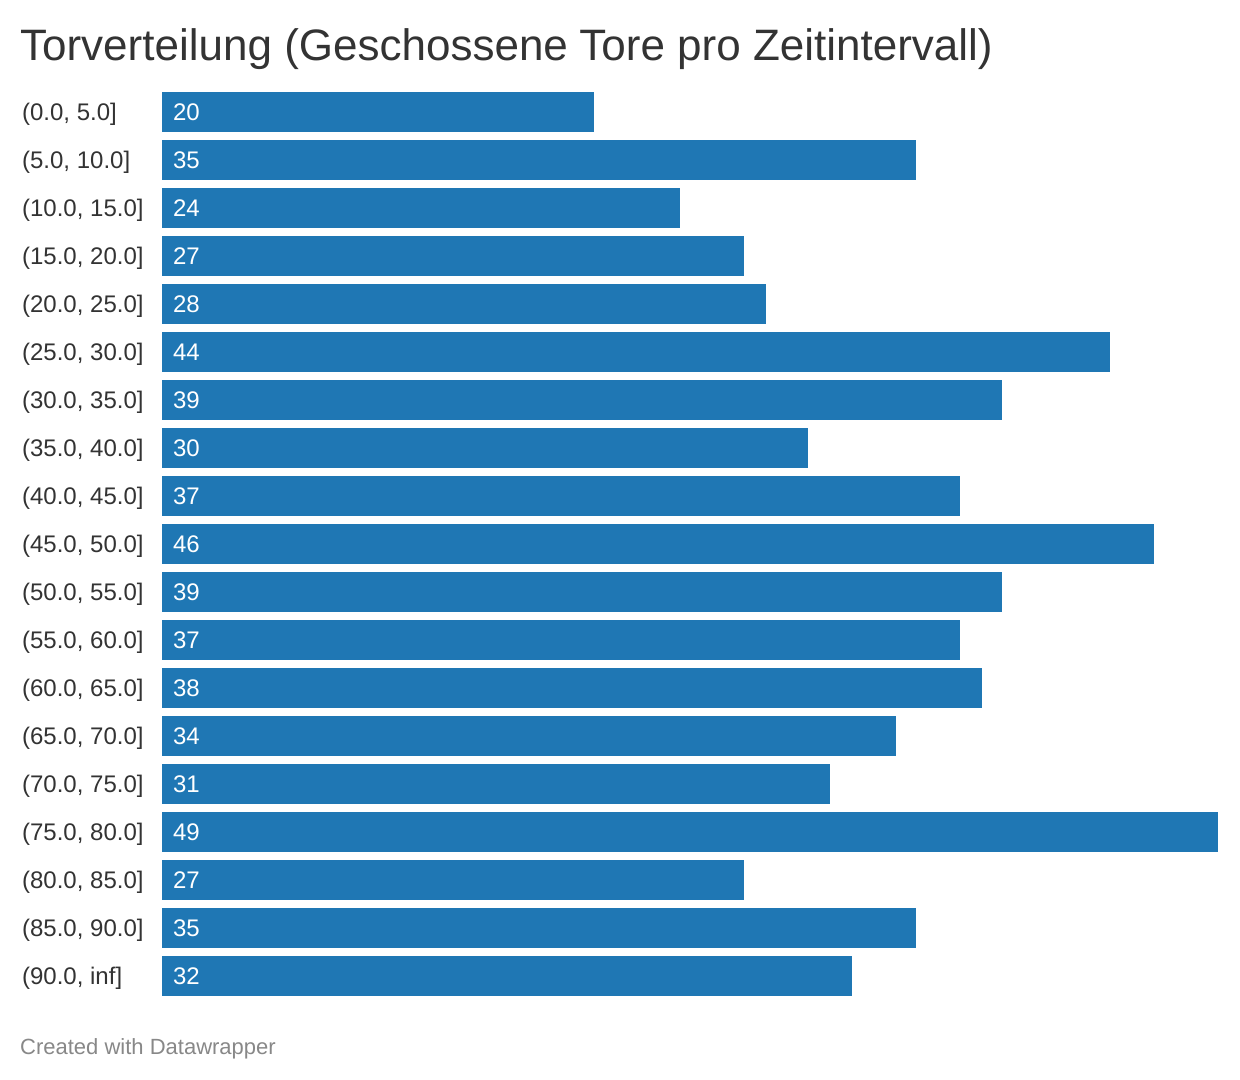

In [76]:
dw.export_chart(torverteilung_chart['id'],output = 'png', filepath = 'chart.png', display = True)

In [78]:
dw.publish_chart(torverteilung_chart['id'])